# Deskripsi Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# memanggil dataset

In [45]:
df = pd.read_csv('toyota.csv')

# Deskripsi Dataset

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


<Axes: >

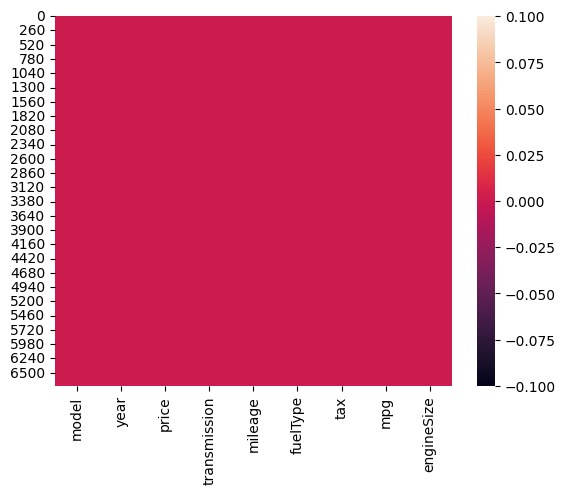

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


# Visualisasi Data

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

ValueError: could not convert string to float: ' GT86'

<Figure size 1000x800 with 0 Axes>

# Jumlah mobil berdasarkan model

In [65]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index() 
models = models.rename(columns={'tax':numberOfCars})

NameError: name 'numberOfCars' is not defined

In [69]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

KeyError: 'Cars'

<Figure size 1500x500 with 0 Axes>

In [66]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

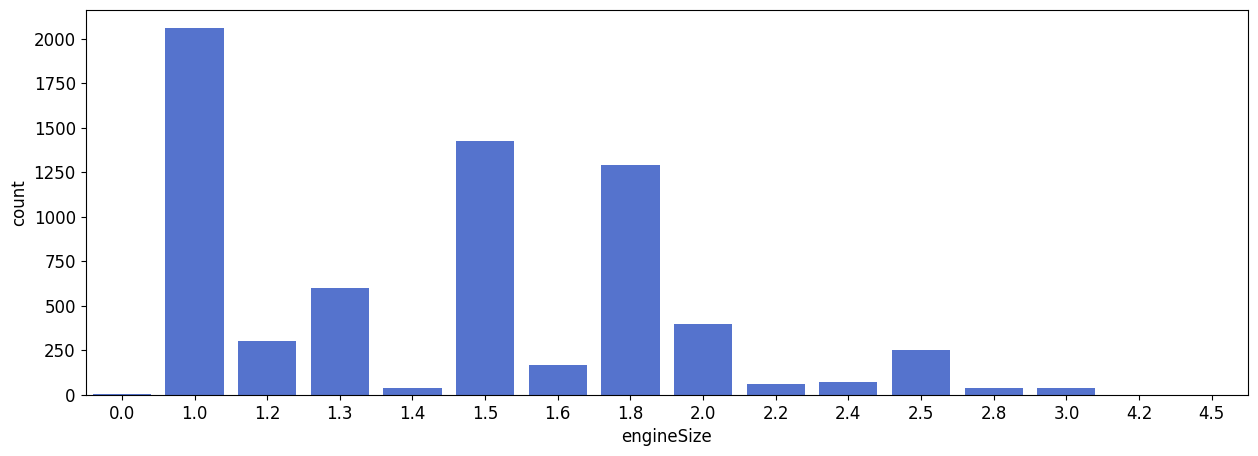

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

# distribusi mileage

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15644\3076171917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

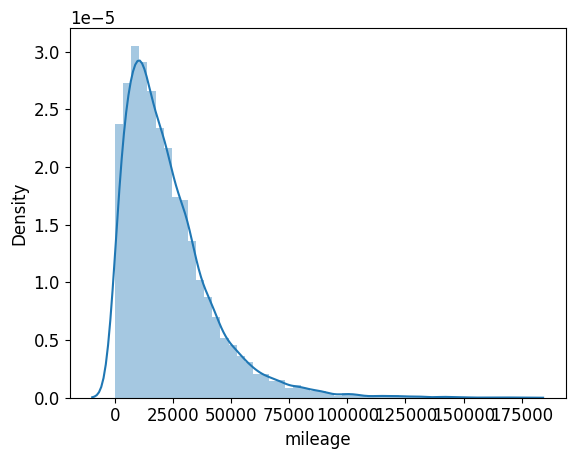

In [70]:
plt.Figure(figsize=(15,5))
sns.distplot(df['mileage'])

# seleksi fitur

In [71]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

# split data training dan data testing

In [74]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

# membuat model regresi linier

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [76]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7678983314475204


# membuat inputan model regresi linier

In [77]:
# Year=2019, mileage=5000, tax=145, mpg=30.2 engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [21208.50538579]


c:\Users\ASUS\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [78]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))